In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

In [61]:
X,Y = make_classification(n_samples=1000, n_features=18,n_informative=4,n_redundant=12,random_state=4)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [63]:
train_score , test_score = list(), list()

In [64]:
values = [i for i in range(1,21)]

In [65]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    accu1 = accuracy_score(y_train,train_pred)
    test_pred = model.predict(x_test)
    accu2 = accuracy_score(y_test,test_pred)
    train_score.append(accu1)
    test_score.append(accu2)
    print('>%d, train: %.3f, test: %.3f' % (i,accu1,accu2))


>1, train: 0.820, test: 0.780
>2, train: 0.834, test: 0.777
>3, train: 0.869, test: 0.847
>4, train: 0.891, test: 0.827
>5, train: 0.929, test: 0.830
>6, train: 0.950, test: 0.823
>7, train: 0.959, test: 0.823
>8, train: 0.974, test: 0.830
>9, train: 0.979, test: 0.817
>10, train: 0.986, test: 0.800
>11, train: 0.993, test: 0.810
>12, train: 0.994, test: 0.820
>13, train: 0.999, test: 0.807
>14, train: 1.000, test: 0.790
>15, train: 1.000, test: 0.807
>16, train: 1.000, test: 0.817
>17, train: 1.000, test: 0.817
>18, train: 1.000, test: 0.800
>19, train: 1.000, test: 0.807
>20, train: 1.000, test: 0.790


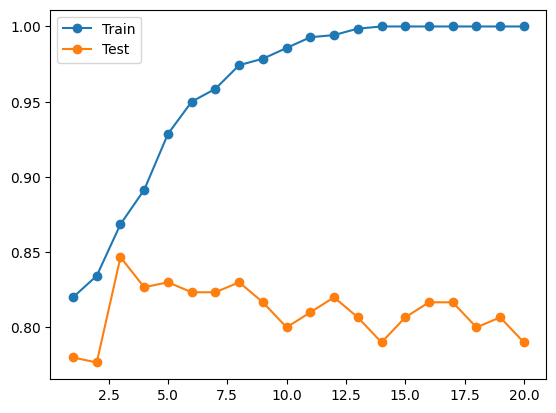

In [66]:
pyplot.plot(values,train_score, '-o',label='Train')
pyplot.plot(values,test_score,'-o',label='Test')
pyplot.legend()
pyplot.show()

In [67]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,10,20], 'min_samples_split': [5,10,20,50,100]}
Clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,n_jobs=-1, scoring='accuracy')
Clf.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'min_samples_split': [5, 10, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [68]:
Clf.best_estimator_

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [69]:
print(accuracy_score(y_train, Clf.best_estimator_.predict(x_train)))
print(accuracy_score(y_test, Clf.best_estimator_.predict(x_test)))

0.8757142857142857
0.8566666666666667


In [70]:
X

array([[-1.21369638, -1.14871967, -1.35901425, ..., -0.20182245,
        -1.48398695, -1.89003121],
       [-5.05504998,  2.88570498, -1.40598809, ...,  3.42810313,
         2.80432532,  2.75249474],
       [-0.54029275, -0.50925369, -1.39243059, ...,  0.51148292,
        -0.07381535, -0.85312751],
       ...,
       [-2.45547256,  1.16897362, -2.23001543, ...,  1.00945603,
         0.64756541,  0.09400996],
       [-1.32513117, -0.51718357, -1.94306751, ..., -0.05506725,
        -0.95562092, -1.56323581],
       [ 1.99346911,  0.13683984,  1.30346068, ...,  0.08327662,
         1.06083159,  1.10317805]], shape=(1000, 18))

In [71]:
Y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,